In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import os
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
from func import ipfread,negsample
import torch


In [44]:
file=open("980.txt","r")
ret=[]
app=[]
for ele in file.read().split("\n"):
    if ele=="":
        ret.append(app)
        app=[]
    else:
        app.append(ele)
ret.append(app)
while [] in ret:
    ret.remove([])
ret_=[]
app=[]
name=[]
for i in range(len(ret)):
    name.append(ret[i][0])
    ret[i].remove(ret[i][0])
    app=[]
    for j in range(len(ret[i])):
        ret[i][j] = ret[i][j].split(",")
#         if name[i]=='20210225':
#             app.append([500-int(ret[i][j][1])-50,int(ret[i][j][0])])
#         else:
        app.append([500-int(ret[i][j][1])-49,int(ret[i][j][0])])
            
    ret_.append(app)
    
            
    

In [12]:
# corner = np.load("output/train_corner_0.npy")
# dic = dict()
# dic["test0b"]=ret_[0]
# dic["test1b"]=ret_[1]
# dic["train1b"]=ret_[2]
# dic["train2b"]=ret_[3]
# dic["train0b"]=corner.tolist()


In [49]:
output=dict()
for i in range(len(ret_)):
    output[name[i]]=ret_[i]
torch.save(output,"../data/980_corner.pkl")


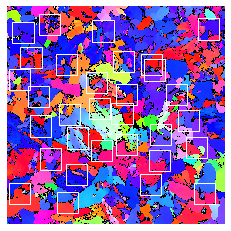

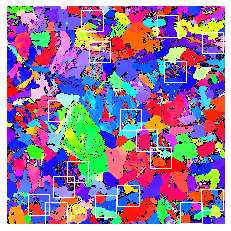

In [51]:
dic=torch.load("../data/980_corner.pkl")
# for ele in ["train","test"]:
for ele in ["980"]:
    path="../data/"+ele+"/"
    for date in os.listdir(path):
        img = ipfread(path+date+"/before/")[:,:,6:][...,[2,1,0]]
        corner = dic[date]
        fig,ax = plt.subplots(1)
        ax.axis("off")
        ax.imshow(img)        
        for i in range(len(corner)):
            sample_y,sample_x = corner[i]
            h,w=50,50
            rect = patches.Rectangle((sample_x,sample_y),49,49,linewidth=1,edgecolor='w',facecolor='none')
            ax.add_patch(rect)
        #     plt.text(sample_x+25, sample_y+25,str(i),color="w")
        plt.savefig("../output/%s_%s.png"%(ele,date),dpi=600,bbox_inches='tight',pad_inches=0)
        plt.show()
        
        
        
  

In [22]:
img = ipfread(path+date+"/before/")[:,:,6:]
# for (i,j) in dic[date]:
#     cv2.imwrite("../output/"+date+"/%s_%s.png"%(i,j),img[i:i+50,j:j+50])
neg_corner=negsample(dic[date])    
for (i,j) in neg_corner:
    cv2.imwrite("../output/"+date+"neg/%s_%s.png"%(i,j),img[i:i+50,j:j+50])


In [21]:
# torch.load("../data/corner.pkl")
